In [1]:
# import urllib.request

In [2]:
# url = "https://data.brasil.io/dataset/covid19/caso_full.csv.gz"
# with urllib.request.urlopen(url) as response, open("dados.gz", 'wb') as out_file:
#     data = response.read() # a `bytes` object
#     out_file.write(data)
    

In [3]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv("covid.csv")
# pd.json_normalize(r.json())

In [5]:
df

,epidemiological_week,date,order_for_place,state,city,city_ibge_code,place_type,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,new_confirmed,last_available_deaths,new_deaths,last_available_death_rate,estimated_population_2019,is_last,is_repeated
0,26,2020-06-23,87,AC,Acrelândia,1200013.0,city,185,1212.63765,0,2,0,0.0108,15256.0,True,False
1,26,2020-06-23,54,AC,Assis Brasil,1200054.0,city,141,1901.03816,0,5,0,0.0355,7417.0,True,False
2,26,2020-06-23,46,AC,Brasiléia,1200104.0,city,267,1016.05906,6,6,0,0.0225,26278.0,True,False
3,26,2020-06-23,77,AC,Bujari,1200138.0,city,146,1422.17027,10,1,0,0.0068,10266.0,True,False
4,26,2020-06-23,47,AC,Capixaba,1200179.0,city,122,1039.80227,0,4,0,0.0328,11733.0,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253430,9,2020-02-27,3,SP,NaN,35.0,state,1,0.00218,0,0,0,0.0000,45919049.0,False,False
253431,9,2020-02-26,2,SP,São Paulo,3550308.0,city,1,0.00816,0,0,0,0.0000,12252023.0,False,False
253432,9,2020-02-26,2,SP,NaN,35.0,state,1,0.00218,0,0,0,0.0000,45919049.0,False,False
253433,9,2020-02-25,1,SP,São Paulo,3550308.0,city,1,0.00816,1,0,0,0.0000,12252023.0,False,False


In [6]:
df.describe()

,epidemiological_week,order_for_place,city_ibge_code,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,new_confirmed,last_available_deaths,new_deaths,last_available_death_rate,estimated_population_2019
count,253435.000000,253435.000000,2.519580e+05,253435.000000,2.458300e+05,253435.000000,253435.000000,253435.000000,253435.000000,2.519580e+05
mean,21.493326,31.581218,3.118510e+06,222.845349,1.495648e+03,9.046738,12.140008,0.414603,2.067930,1.567072e+05
std,3.141438,21.837393,1.028453e+06,2829.876888,3.055499e+04,111.027066,188.640584,5.850230,14.810911,1.358126e+06
min,9.000000,1.000000,1.100000e+01,0.000000,2.180000e-03,-4289.000000,0.000000,-131.000000,0.000000,8.370000e+02
25%,19.000000,14.000000,2.407104e+06,2.000000,1.437936e+01,0.000000,0.000000,0.000000,0.000000,8.674000e+03
50%,22.000000,28.000000,3.131406e+06,7.000000,4.427624e+01,0.000000,0.000000,0.000000,0.000000,1.898500e+04
75%,24.000000,46.000000,4.103206e+06,33.000000,1.477396e+02,1.000000,1.000000,0.000000,0.050000,4.389900e+04
max,26.000000,120.000000,5.300108e+06,229475.000000,3.155776e+06,19030.000000,13068.000000,434.000000,375.000000,4.591905e+07


In [7]:
estados = df[df["place_type"] == 'state']

In [8]:
estados

,epidemiological_week,date,order_for_place,state,city,city_ibge_code,place_type,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,new_confirmed,last_available_deaths,new_deaths,last_available_death_rate,estimated_population_2019,is_last,is_repeated
22,26,2020-06-23,99,AC,NaN,12.0,state,11810,1339.10095,271,321,16,0.0272,881935.0,True,False
126,26,2020-06-23,108,AL,NaN,27.0,state,30246,906.28602,851,920,17,0.0304,3337357.0,True,False
188,26,2020-06-23,103,AM,NaN,13.0,state,65073,1570.06821,1342,2686,15,0.0413,4144597.0,True,False
205,26,2020-06-23,96,AP,NaN,16.0,state,26437,3125.93484,1575,380,8,0.0144,845731.0,True,False
586,26,2020-06-23,110,BA,NaN,29.0,state,49084,330.01942,1998,1491,50,0.0304,14873064.0,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253426,9,2020-02-29,5,SP,NaN,35.0,state,2,0.00436,0,0,0,0.0000,45919049.0,False,False
253428,9,2020-02-28,4,SP,NaN,35.0,state,2,0.00436,1,0,0,0.0000,45919049.0,False,False
253430,9,2020-02-27,3,SP,NaN,35.0,state,1,0.00218,0,0,0,0.0000,45919049.0,False,False
253432,9,2020-02-26,2,SP,NaN,35.0,state,1,0.00218,0,0,0,0.0000,45919049.0,False,False


In [9]:
estados["new_deaths"].sum()

52775

In [10]:
semana = estados.groupby("epidemiological_week", as_index=False).sum()

In [11]:
semana

,epidemiological_week,order_for_place,city_ibge_code,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,new_confirmed,last_available_deaths,new_deaths,last_available_death_rate,estimated_population_2019,is_last,is_repeated
0,9,15,175.0,7,1.526000e-02,2,0,0,0.0000,2.295952e+08,0.0,0.0
1,10,79,551.0,50,2.396900e-01,17,0,0,0.0000,4.180455e+08,0.0,1.0
2,11,399,2629.0,443,3.136060e+00,117,0,0,0.0000,9.655304e+08,0.0,14.0
3,12,1230,4692.0,3980,2.081180e+02,996,40,18,0.1825,1.346966e+09,0.0,19.0
4,13,2485,5502.0,18782,1.033495e+03,2821,450,97,26.1556,1.471030e+09,0.0,7.0
5,14,3808,5502.0,49409,5.837060e+03,6428,1864,330,519.0897,1.471030e+09,0.0,4.0
6,15,5131,5502.0,113123,1.641076e+04,10610,5755,696,1010.8929,1.471030e+09,0.0,3.0
7,16,6454,5502.0,203779,4.848146e+03,16184,12414,1234,694.8040,1.471030e+09,0.0,2.0
8,17,7777,5502.0,334104,4.150802e+03,22331,21946,1699,1303.2069,1.471030e+09,0.0,1.0
9,18,9100,5502.0,561039,5.954859e+04,37924,38759,2734,743.2943,1.471030e+09,0.0,3.0


In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

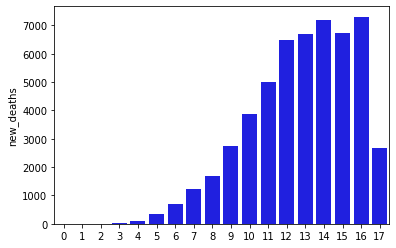

In [15]:
ax = sns.barplot(x=semana.index, y="new_deaths", data=semana, ci=None, color="blue")

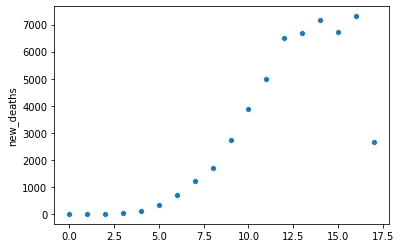

In [16]:
ax = sns.scatterplot(x=semana.index, y="new_deaths", data=semana)

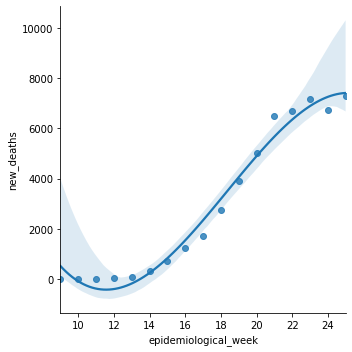

In [17]:
sns.lmplot(data=semana[semana["epidemiological_week"] <26], x="epidemiological_week", y="new_deaths", order=3)

In [18]:
estados['day_of_week'] = pd.to_datetime(estados['date']).dt.day_name()

<ipython-input-18-5ec924b28865>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  estados['day_of_week'] = pd.to_datetime(estados['date']).dt.day_name()


In [19]:
estados

,epidemiological_week,date,order_for_place,state,city,city_ibge_code,place_type,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,new_confirmed,last_available_deaths,new_deaths,last_available_death_rate,estimated_population_2019,is_last,is_repeated,day_of_week
22,26,2020-06-23,99,AC,NaN,12.0,state,11810,1339.10095,271,321,16,0.0272,881935.0,True,False,Tuesday
126,26,2020-06-23,108,AL,NaN,27.0,state,30246,906.28602,851,920,17,0.0304,3337357.0,True,False,Tuesday
188,26,2020-06-23,103,AM,NaN,13.0,state,65073,1570.06821,1342,2686,15,0.0413,4144597.0,True,False,Tuesday
205,26,2020-06-23,96,AP,NaN,16.0,state,26437,3125.93484,1575,380,8,0.0144,845731.0,True,False,Tuesday
586,26,2020-06-23,110,BA,NaN,29.0,state,49084,330.01942,1998,1491,50,0.0304,14873064.0,True,False,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253426,9,2020-02-29,5,SP,NaN,35.0,state,2,0.00436,0,0,0,0.0000,45919049.0,False,False,Saturday
253428,9,2020-02-28,4,SP,NaN,35.0,state,2,0.00436,1,0,0,0.0000,45919049.0,False,False,Friday
253430,9,2020-02-27,3,SP,NaN,35.0,state,1,0.00218,0,0,0,0.0000,45919049.0,False,False,Thursday
253432,9,2020-02-26,2,SP,NaN,35.0,state,1,0.00218,0,0,0,0.0000,45919049.0,False,False,Wednesday


In [20]:
cats = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

dia = estados.groupby("day_of_week").sum().reindex(cats)

In [21]:
dia

,epidemiological_week,order_for_place,city_ibge_code,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,new_confirmed,last_available_deaths,new_deaths,last_available_death_rate,estimated_population_2019,is_last,is_repeated
day_of_week,,,,,,,,,,,,
Sunday,7662,21183,11863.0,4184253,2.199936e+05,106447,226042,4622,1408.9009,3.270472e+09,0.0,17.0
Monday,7674,21587,11886.0,4316854,1.444374e+06,132601,232010,5968,1668.1422,3.279604e+09,4.0,9.0
Tuesday,7706,21994,11976.0,4519278,8.767141e+04,202424,241908,9898,1521.3148,3.337782e+09,23.0,12.0
Wednesday,7028,19591,11222.0,3536938,2.135648e+06,168901,197201,8068,1102.8505,3.137811e+09,0.0,7.0
Thursday,7126,19982,11519.0,3708566,2.186416e+05,171628,206169,8968,1159.0332,3.205067e+09,0.0,6.0
Friday,7195,20379,11660.0,3910971,4.955248e+05,202405,214356,8187,1462.7677,3.237267e+09,0.0,5.0
Saturday,7239,20780,11805.0,4077806,5.968900e+05,166835,221420,7064,1779.5123,3.245966e+09,0.0,18.0


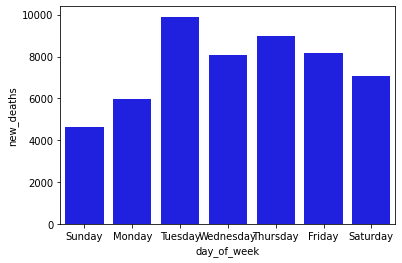

In [22]:
ax = sns.barplot(x=dia.index, y="new_deaths", data=dia, ci=None, color="blue")

In [23]:
domingo = estados["day_of_week"] == "Sunday"
segunda = estados["day_of_week"] == "Monday"
terca = estados["day_of_week"] == "Tuesday"
quarta = estados["day_of_week"] == "Wednesday"
quinta = estados["day_of_week"] == "Thursday"
sexta = estados["day_of_week"] == "Friday"
sabado = estados["day_of_week"] == "Saturday"

In [24]:
sunday = estados[domingo].groupby("date", as_index=False).sum()
monday = estados[segunda].groupby("date", as_index=False).sum()
tuesday = estados[terca].groupby("date", as_index=False).sum()
wednesday = estados[quarta].groupby("date", as_index=False).sum()
thursday = estados[quinta].groupby("date", as_index=False).sum()
friday = estados[sexta].groupby("date", as_index=False).sum()
saturday = estados[sabado].groupby("date", as_index=False).sum()

In [25]:
monday["new_deaths"].sum()

5968

[Text(0, 0, '2020-03-01'),
 Text(0, 0, '2020-03-08'),
 Text(0, 0, '2020-03-15'),
 Text(0, 0, '2020-03-22'),
 Text(0, 0, '2020-03-29'),
 Text(0, 0, '2020-04-05'),
 Text(0, 0, '2020-04-12'),
 Text(0, 0, '2020-04-19'),
 Text(0, 0, '2020-04-26'),
 Text(0, 0, '2020-05-03'),
 Text(0, 0, '2020-05-10'),
 Text(0, 0, '2020-05-17'),
 Text(0, 0, '2020-05-24'),
 Text(0, 0, '2020-05-31'),
 Text(0, 0, '2020-06-07'),
 Text(0, 0, '2020-06-14'),
 Text(0, 0, '2020-06-21')]

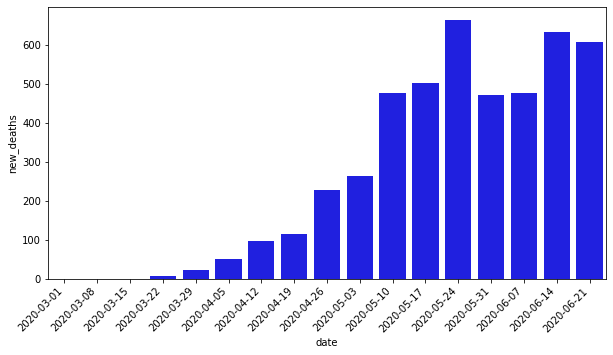

In [58]:
plt.figure(figsize=(10,5))
ax = sns.barplot(x="date", y="new_deaths", data=sunday, ci=None, color="blue")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

[Text(0, 0, '2020-03-02'),
 Text(0, 0, '2020-03-09'),
 Text(0, 0, '2020-03-16'),
 Text(0, 0, '2020-03-23'),
 Text(0, 0, '2020-03-30'),
 Text(0, 0, '2020-04-06'),
 Text(0, 0, '2020-04-13'),
 Text(0, 0, '2020-04-20'),
 Text(0, 0, '2020-04-27'),
 Text(0, 0, '2020-05-04'),
 Text(0, 0, '2020-05-11'),
 Text(0, 0, '2020-05-18'),
 Text(0, 0, '2020-05-25'),
 Text(0, 0, '2020-06-01'),
 Text(0, 0, '2020-06-08'),
 Text(0, 0, '2020-06-15'),
 Text(0, 0, '2020-06-22')]

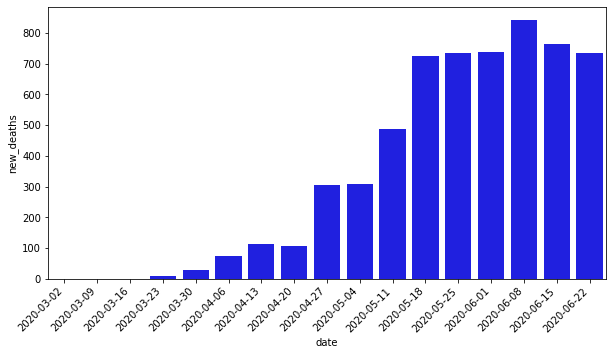

In [59]:
plt.figure(figsize=(10,5))
ax = sns.barplot(x="date", y="new_deaths", data=monday, ci=None, color="blue")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

[Text(0, 0, '2020-02-25'),
 Text(0, 0, '2020-03-03'),
 Text(0, 0, '2020-03-10'),
 Text(0, 0, '2020-03-17'),
 Text(0, 0, '2020-03-24'),
 Text(0, 0, '2020-03-31'),
 Text(0, 0, '2020-04-07'),
 Text(0, 0, '2020-04-14'),
 Text(0, 0, '2020-04-21'),
 Text(0, 0, '2020-04-28'),
 Text(0, 0, '2020-05-05'),
 Text(0, 0, '2020-05-12'),
 Text(0, 0, '2020-05-19'),
 Text(0, 0, '2020-05-26'),
 Text(0, 0, '2020-06-02'),
 Text(0, 0, '2020-06-09'),
 Text(0, 0, '2020-06-16'),
 Text(0, 0, '2020-06-23')]

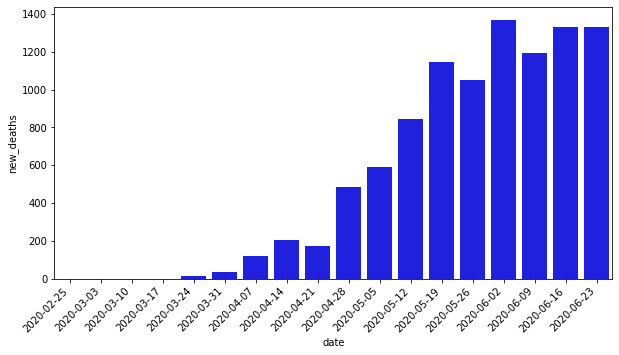

In [60]:
plt.figure(figsize=(10,5))
ax = sns.barplot(x="date", y="new_deaths", data=tuesday, ci=None, color="blue")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

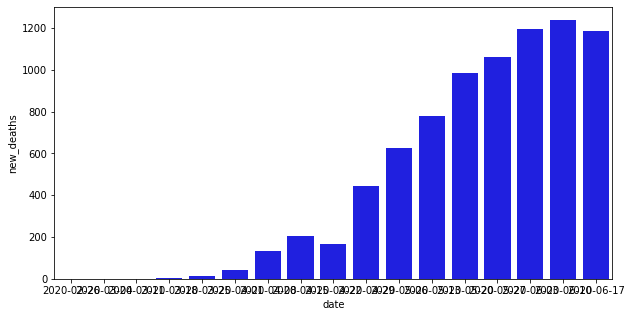

In [61]:
plt.figure(figsize=(10,5))
ax = sns.barplot(x="date", y="new_deaths", data=wednesday, ci=None, color="blue")

[Text(0, 0, '2020-02-27'),
 Text(0, 0, '2020-03-05'),
 Text(0, 0, '2020-03-12'),
 Text(0, 0, '2020-03-19'),
 Text(0, 0, '2020-03-26'),
 Text(0, 0, '2020-04-02'),
 Text(0, 0, '2020-04-09'),
 Text(0, 0, '2020-04-16'),
 Text(0, 0, '2020-04-23'),
 Text(0, 0, '2020-04-30'),
 Text(0, 0, '2020-05-07'),
 Text(0, 0, '2020-05-14'),
 Text(0, 0, '2020-05-21'),
 Text(0, 0, '2020-05-28'),
 Text(0, 0, '2020-06-04'),
 Text(0, 0, '2020-06-11'),
 Text(0, 0, '2020-06-18')]

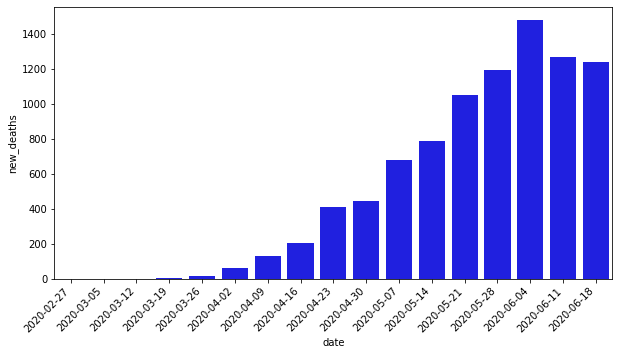

In [62]:
plt.figure(figsize=(10,5))
ax = sns.barplot(x="date", y="new_deaths", data=thursday, ci=None, color="blue")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

[Text(0, 0, '2020-02-28'),
 Text(0, 0, '2020-03-06'),
 Text(0, 0, '2020-03-13'),
 Text(0, 0, '2020-03-20'),
 Text(0, 0, '2020-03-27'),
 Text(0, 0, '2020-04-03'),
 Text(0, 0, '2020-04-10'),
 Text(0, 0, '2020-04-17'),
 Text(0, 0, '2020-04-24'),
 Text(0, 0, '2020-05-01'),
 Text(0, 0, '2020-05-08'),
 Text(0, 0, '2020-05-15'),
 Text(0, 0, '2020-05-22'),
 Text(0, 0, '2020-05-29'),
 Text(0, 0, '2020-06-05'),
 Text(0, 0, '2020-06-12'),
 Text(0, 0, '2020-06-19')]

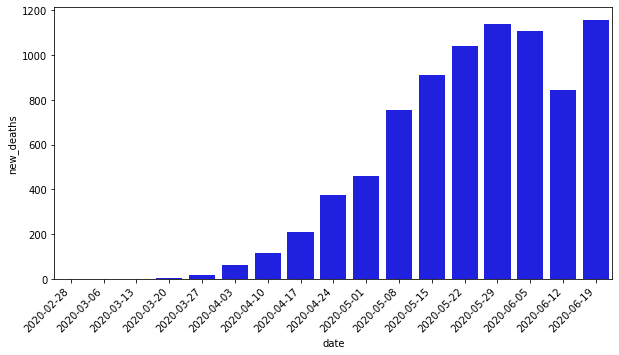

In [55]:
plt.figure(figsize=(10,5))
ax = sns.barplot(x="date", y="new_deaths", data=friday, ci=None, color="blue")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

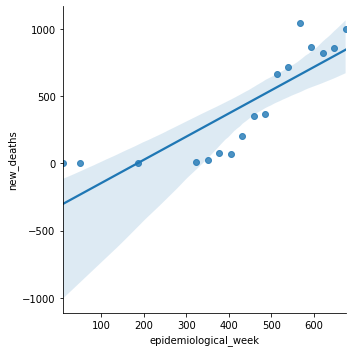

In [44]:
sns.lmplot(data=saturday, x="epidemiological_week", y="new_deaths", order=1)

In [64]:
saturday

,date,epidemiological_week,order_for_place,city_ibge_code,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,new_confirmed,last_available_deaths,new_deaths,last_available_death_rate,estimated_population_2019,is_last,is_repeated
0,2020-02-29,9,5,35.0,2,0.00436,0,0,0,0.0000,45919049.0,0.0,0.0
1,2020-03-07,50,21,182.0,19,0.11138,5,0,0,0.0000,85090974.0,0.0,1.0
2,2020-03-14,187,97,584.0,136,1.16912,40,0,0,0.0000,172895790.0,0.0,7.0
3,2020-03-21,324,247,786.0,1132,13.59134,202,18,7,0.0631,210147125.0,0.0,1.0
4,2020-03-28,351,436,786.0,3953,43.94502,477,115,22,9.3224,210147125.0,0.0,2.0
5,2020-04-04,378,625,786.0,10381,3775.18849,1169,445,80,101.9996,210147125.0,0.0,0.0
6,2020-04-11,405,814,786.0,20991,225.93995,1054,1141,68,84.2571,210147125.0,0.0,0.0
7,2020-04-18,432,1003,786.0,37175,438.45979,2778,2375,202,77.2829,210147125.0,0.0,0.0
8,2020-04-25,459,1192,786.0,59506,755.85834,5297,4074,352,177.1567,210147125.0,0.0,0.0
9,2020-05-02,486,1381,786.0,97430,1305.51406,4848,6808,370,224.0430,210147125.0,0.0,1.0


In [73]:
novo_df = pd.DataFrame()

In [74]:
# novo_df["date"], novo_df["new_deaths"] = saturday["date"], saturday["new_deaths"]
novo_df = saturday["date"]

In [75]:
novo_df

RecursionError: maximum recursion depth exceeded

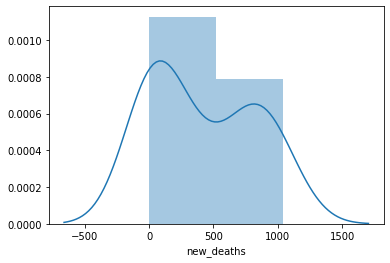

In [63]:
sns.distplot(saturday["new_deaths"])

In [46]:
from sklearn.preprocessing import PolynomialFeatures